# Lasso Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn import linear_model
import scipy.stats as stats
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV

Rozważmy następujący zbiór punktów:

In [2]:
f = lambda x: ((x*2-1)*(x**2-2)*(x-2)+3)
x = stats.uniform(0,3).rvs(100)
y = f(x) + stats.norm(0,1).rvs(len(x))
x=np.vstack(x)

# Zadanie 
Proszę wykonać regresję (Lasso Regression) na powyższym zbiorze danych dobierając optymalny parametr $\alpha$. 

In [3]:
plt.style.use("seaborn-white")

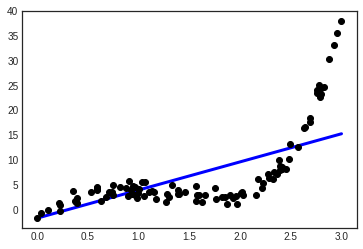

In [4]:
clf = linear_model.LassoCV(alphas=[1.0,10.0,20.0])
clf.fit(x, y) 

x_plot = np.vstack(np.linspace(0, 3, 100))
plt.plot(x_plot, clf.predict(x_plot), color='blue',linewidth=3)
plt.plot(x, y, 'ok');
plt.show()

# Zadanie 
Proszę wykonać regresję (Lasso Regression) oraz klasyczną regresję z różnym stopniem wielomianu oraz optymalnym parametrem $\alpha$ . 

In [5]:
model20_linear = make_pipeline(PolynomialFeatures(20),linear_model.LinearRegression())
model20_ridge = make_pipeline(PolynomialFeatures(20),linear_model.Ridge(alpha=10.0))
model20_lasso = make_pipeline(PolynomialFeatures(20),linear_model.Lasso(alpha=10.0))

seed = 123
fold = model_selection.KFold(n_splits=4,shuffle=True,random_state=seed)

In [6]:
print(model_selection.cross_val_score(model20_linear,x,y,cv=fold))
print(model_selection.cross_val_score(model20_ridge,x,y,cv=fold))
print(model_selection.cross_val_score(model20_lasso,x,y,cv=fold))

[ 0.96079287 -3.55401293  0.97432356  0.9869418 ]
[ 0.96038847  0.81419641  0.9713233   0.97823017]
[ 0.95100526  0.97895948  0.96842461  0.97692426]


/home/kodolamacz/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/kodolamacz/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/kodolamacz/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/kodolamacz/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Obje

## Lasso versus Ridge regression

In [17]:
grid_lasso = GridSearchCV(make_pipeline(PolynomialFeatures(degree=1),linear_model.Lasso(alpha=0.2)),
                   param_grid = {'polynomialfeatures__degree':[1,2,3,4,5,6,7],
                                'lasso__alpha':[0.5,1.0,2.0,5.0,10.0]},
                   cv=fold,
                   refit=True)
grid_lasso.fit(x,y)

/home/kodolamacz/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/kodolamacz/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/kodolamacz/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/kodolamacz/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Obje

GridSearchCV(cv=KFold(n_splits=4, random_state=123, shuffle=True),
       error_score='raise',
       estimator=Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=1, include_bias=True, interaction_only=False)), ('lasso', Lasso(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'polynomialfeatures__degree': [1, 2, 3, 4, 5, 6, 7], 'lasso__alpha': [0.5, 1.0, 2.0, 5.0, 10.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [18]:
grid_lasso.best_params_

{'lasso__alpha': 1.0, 'polynomialfeatures__degree': 7}

In [19]:
grid_lasso.best_score_

0.96734875504493179

In [66]:
grid_lasso.grid_scores_

/home/kodolamacz/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.49862, std: 0.09819, params: {'lasso__alpha': 0.5, 'polynomialfeatures__degree': 1},
 mean: 0.65081, std: 0.11044, params: {'lasso__alpha': 0.5, 'polynomialfeatures__degree': 2},
 mean: 0.84907, std: 0.06131, params: {'lasso__alpha': 0.5, 'polynomialfeatures__degree': 3},
 mean: 0.93702, std: 0.01742, params: {'lasso__alpha': 0.5, 'polynomialfeatures__degree': 4},
 mean: 0.96076, std: 0.01146, params: {'lasso__alpha': 0.5, 'polynomialfeatures__degree': 5},
 mean: 0.96711, std: 0.01125, params: {'lasso__alpha': 0.5, 'polynomialfeatures__degree': 6},
 mean: 0.96733, std: 0.01020, params: {'lasso__alpha': 0.5, 'polynomialfeatures__degree': 7},
 mean: 0.48933, std: 0.08746, params: {'lasso__alpha': 1.0, 'polynomialfeatures__degree': 1},
 mean: 0.65088, std: 0.10601, params: {'lasso__alpha': 1.0, 'polynomialfeatures__degree': 2},
 mean: 0.76807, std: 0.08848, params: {'lasso__alpha': 1.0, 'polynomialfeatures__degree': 3},
 mean: 0.91053, std: 0.03624, params: {'lasso__alpha': 1.0, 

In [67]:
grid_ridge = GridSearchCV(make_pipeline(PolynomialFeatures(degree=1),linear_model.Ridge(alpha=0.2)),
                   param_grid = {'polynomialfeatures__degree':[1,2,3,4,5,6,7,15,20],
                                'ridge__alpha':[0.2,0.5,1.0,2.0,5.0,10.0]},
                   cv=fold,
                   refit=True)
grid_ridge.fit(x,y)

GridSearchCV(cv=KFold(n_splits=4, random_state=123, shuffle=True),
       error_score='raise',
       estimator=Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=1, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'polynomialfeatures__degree': [1, 2, 3, 4, 5, 6, 7, 15, 20], 'ridge__alpha': [0.2, 0.5, 1.0, 2.0, 5.0, 10.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [68]:
grid_ridge.best_params_

{'polynomialfeatures__degree': 4, 'ridge__alpha': 0.2}

In [69]:
grid_ridge.best_score_

0.98253335546742915

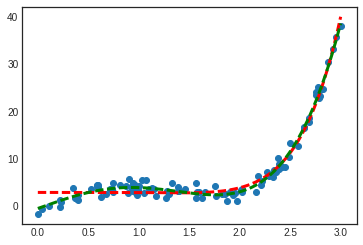

In [70]:
x_plt=np.linspace(0,3,200)
plt.scatter(x,y),
plt.plot(x_plt,grid_lasso.predict(x_plt[:,np.newaxis]),"r--",linewidth=3)
plt.plot(x_plt,grid_ridge.predict(x_plt[:,np.newaxis]),"g--",linewidth=3)
plt.show()